In [1]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

--2022-06-24 17:45:07--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.41.168.111, 2600:141b:f000:c09f::e59, 2600:141b:f000:c08a::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.41.168.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  92.5MB/s    in 8.4s    

2022-06-24 17:45:15 (93.2 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [3]:
!ls "PetImages/"

Cat  Dog


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from tqdm import tqdm

In [5]:
len(os.listdir("PetImages/Dog"))

12501

In [6]:
len(os.listdir("PetImages/Cat"))

12501

In [7]:
DataPath = pathlib.Path("PetImages")
all_paths = DataPath.glob("*/*.jpg")
all_paths

<generator object Path.glob at 0x7fc3b431bd50>

In [8]:
all_paths = list(all_paths)
all_paths[:10]

[PosixPath('PetImages/Dog/1325.jpg'),
 PosixPath('PetImages/Dog/9945.jpg'),
 PosixPath('PetImages/Dog/3635.jpg'),
 PosixPath('PetImages/Dog/9925.jpg'),
 PosixPath('PetImages/Dog/4876.jpg'),
 PosixPath('PetImages/Dog/5838.jpg'),
 PosixPath('PetImages/Dog/5058.jpg'),
 PosixPath('PetImages/Dog/1726.jpg'),
 PosixPath('PetImages/Dog/12180.jpg'),
 PosixPath('PetImages/Dog/3000.jpg')]

In [9]:
# map to string
all_paths = list(map(lambda x: str(x), all_paths))
all_paths[:10]

['PetImages/Dog/1325.jpg',
 'PetImages/Dog/9945.jpg',
 'PetImages/Dog/3635.jpg',
 'PetImages/Dog/9925.jpg',
 'PetImages/Dog/4876.jpg',
 'PetImages/Dog/5838.jpg',
 'PetImages/Dog/5058.jpg',
 'PetImages/Dog/1726.jpg',
 'PetImages/Dog/12180.jpg',
 'PetImages/Dog/3000.jpg']

In [10]:
from random import shuffle

shuffle(all_paths)
all_paths[:10]

['PetImages/Dog/795.jpg',
 'PetImages/Cat/6889.jpg',
 'PetImages/Dog/1538.jpg',
 'PetImages/Dog/85.jpg',
 'PetImages/Cat/4125.jpg',
 'PetImages/Cat/3333.jpg',
 'PetImages/Cat/10924.jpg',
 'PetImages/Dog/5774.jpg',
 'PetImages/Dog/4213.jpg',
 'PetImages/Dog/11829.jpg']

In [11]:
def TestImageQuality(all_paths):
  new_all_paths = []
  for path in tqdm(all_paths):
    try:
      image = tf.io.read_file(path)
      image = tf.io.decode_jpeg(image, channels = 3)
    except:
      continue
    new_all_paths.append(path)
  return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [00:36<00:00, 690.29it/s]


['PetImages/Dog/795.jpg',
 'PetImages/Cat/6889.jpg',
 'PetImages/Dog/1538.jpg',
 'PetImages/Dog/85.jpg',
 'PetImages/Cat/4125.jpg',
 'PetImages/Cat/3333.jpg',
 'PetImages/Cat/10924.jpg',
 'PetImages/Dog/5774.jpg',
 'PetImages/Dog/4213.jpg',
 'PetImages/Dog/11829.jpg']

In [12]:
def get_label(image_path):
  return image_path.split("/")[-2]

all_labels = list(map(lambda x: get_label(x), all_paths))
all_labels[:10]

['Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog']

In [13]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [14]:
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(all_paths, all_labels)

In [15]:
Train_paths[:10], Train_labels[:10]

(['PetImages/Dog/1984.jpg',
  'PetImages/Cat/10371.jpg',
  'PetImages/Cat/1274.jpg',
  'PetImages/Dog/10205.jpg',
  'PetImages/Cat/10672.jpg',
  'PetImages/Cat/5064.jpg',
  'PetImages/Cat/4400.jpg',
  'PetImages/Cat/2098.jpg',
  'PetImages/Dog/7042.jpg',
  'PetImages/Cat/5427.jpg'],
 array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0]))

In [16]:
# Function to decode jpeg into Tensor
# Function is used as image loader

def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [17]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 128

# Basic transformation
# define Sequential object and define the augmentation methods in it
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [18]:
# Create Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE  # automatically assigns parallel_calls

def get_dataset(paths, labels, train = True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

  dataset = dataset.map(lambda image, label: load(image, label))
  dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
    dataset = dataset.repeat()
  return dataset

In [19]:
# Create Train Dataset object and verify it

%time train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))

print(image.shape)
print(label.shape)

CPU times: user 429 ms, sys: 14.9 ms, total: 443 ms
Wall time: 566 ms
(128, 224, 224, 3)
(128,)


Dog


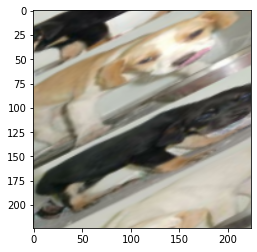

In [20]:
# View a sample of Training Images
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [21]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

# (128,) is the batch size
# 224, 224, 3 is the size of each image in the batch

CPU times: user 23.9 ms, sys: 677 µs, total: 24.6 ms
Wall time: 29.6 ms
(128, 224, 224, 3)
(128,)


Cat


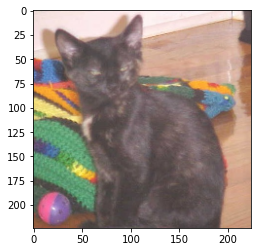

In [22]:
# View a sample Training image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [23]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))

print(image.shape)
print(label.shape)

CPU times: user 27.8 ms, sys: 870 µs, total: 28.7 ms
Wall time: 31.6 ms
(128, 224, 224, 3)
(128,)


In [24]:
# Model part
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPool2D

model = Sequential()

# Block 1
model.add(Conv2D(input_shape=(224, 224, 3), padding='same', filters=32, kernel_size=(7, 7)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(filters=64, padding='valid', kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(filters=128, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(filters=256, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalMaxPool2D())

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [25]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      4736      
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)     

In [26]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(Val_paths)//BATCH_SIZE
)

Epoch 1/10
145/145 [==============================] - 201s 1s/step - loss: 0.8180 - accuracy: 0.6057 - val_loss: 0.6508 - val_accuracy: 0.6050
Epoch 2/10
145/145 [==============================] - 180s 1s/step - loss: 0.5830 - accuracy: 0.6902 - val_loss: 0.8783 - val_accuracy: 0.5059
Epoch 3/10
145/145 [==============================] - 175s 1s/step - loss: 0.5561 - accuracy: 0.7116 - val_loss: 0.5561 - val_accuracy: 0.7075
Epoch 4/10
145/145 [==============================] - 174s 1s/step - loss: 0.5412 - accuracy: 0.7277 - val_loss: 0.5398 - val_accuracy: 0.7238
Epoch 5/10
145/145 [==============================] - 174s 1s/step - loss: 0.5120 - accuracy: 0.7467 - val_loss: 0.5376 - val_accuracy: 0.7285
Epoch 6/10
145/145 [==============================] - 172s 1s/step - loss: 0.4816 - accuracy: 0.7679 - val_loss: 0.6267 - val_accuracy: 0.6370
Epoch 7/10
145/145 [==============================] - 171s 1s/step - loss: 0.4497 - accuracy: 0.7896 - val_loss: 0.5229 - val_accuracy: 0.7292

In [28]:
# Evaluating the loaded model
loss, acc = model.evaluate(val_dataset)

print(" Testing Acc : ", acc)
print(" Testing Loss : ", loss)

49/49 [==============================] - 16s 303ms/step - loss: 0.3443 - accuracy: 0.8460
 Testing Acc :  0.8459555506706238
 Testing Loss :  0.344256192445755


In [29]:
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

94683136/94668760 [==============================] - 0s 0us/step


In [30]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 23,521,409
Non-trainable params: 45,440
_________________________________________________________________
None


In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [32]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

Epoch 1/10
145/145 [==============================] - 254s 2s/step - loss: 0.2405 - accuracy: 0.9006 - val_loss: 0.8291 - val_accuracy: 0.7682
Epoch 2/10
145/145 [==============================] - 245s 2s/step - loss: 0.1715 - accuracy: 0.9275 - val_loss: 0.2873 - val_accuracy: 0.8778
Epoch 3/10
145/145 [==============================] - 241s 2s/step - loss: 0.1474 - accuracy: 0.9399 - val_loss: 0.1825 - val_accuracy: 0.9214
Epoch 4/10
145/145 [==============================] - 241s 2s/step - loss: 0.1215 - accuracy: 0.9514 - val_loss: 0.3845 - val_accuracy: 0.7987
Epoch 5/10
145/145 [==============================] - 239s 2s/step - loss: 0.1251 - accuracy: 0.9491 - val_loss: 0.2219 - val_accuracy: 0.9015
Epoch 6/10
145/145 [==============================] - 239s 2s/step - loss: 0.1120 - accuracy: 0.9547 - val_loss: 0.2295 - val_accuracy: 0.9150
Epoch 7/10
145/145 [==============================] - 238s 2s/step - loss: 0.1029 - accuracy: 0.9569 - val_loss: 0.1928 - val_accuracy: 0.9199